Script to demonstrate the propagation of errors by representing
each measurement as a distribution of values with the stated
mean and standard deviation. 

Comparisons are made between standard error estimation and the 
numerical results

Added demonstration of the standard deviation of the mean

Dr. Swift

In [6]:
#imports 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
 #----------------------------------------------------------------------
# Consistency of results
# -- measured gravitational acceleration
g_meas = 9.72
g_err = 0.05
# -- accepted value of g
g_real = 9.80665

# Percent error
perr = np.abs(g_meas-g_real)/g_real * 100
print('Measurement is accurate to %.2f%%'%perr)

# z-score
from scipy.special import erf, erfc

z = np.abs(g_meas - g_real)/g_err
# Can reject the hypothesis (that the measurement is consistent with
# the accepted value) with calculated confidence (2-sided)
pval = erfc(z/np.sqrt(2))

confidence = erf(z/np.sqrt(2)) * 100
print('Measurement is inconsistent with accepted value with confidence of %.2f%%'%confidence)

The measured standard deviation of "d3" is: 2.236731053280722
The calculated standard deviation of "d3" is: 2.23606797749979
The measured standard deviation of "d4" is: 9.437507548741367
The calculated standard deviation of "d4" is: 9.219544457292887
The measured standard deviation of "d5" is: 170.2419686393204
The calculated standard deviation of "d5" is: 108.0529594619463


Text(0.5, 1.0, 'Error Propagation When Raising a Number to the Fourth Power')

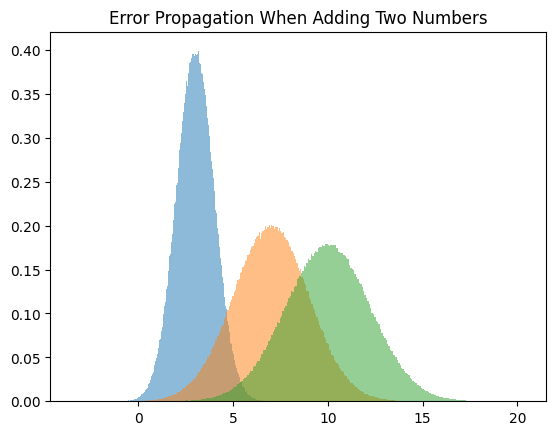

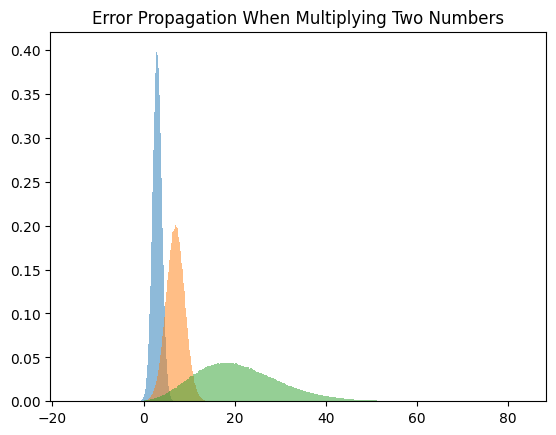

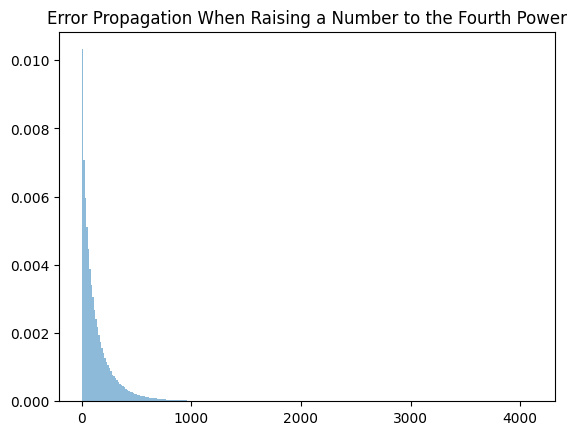

In [8]:
#----------------------------------------------------------------------
# Measurements as distributions
# -- Create two "measurements," represented as distinct distributions

# -- number of values in the distribution
sz = 1000000
# -- values of the measurements
val1 = 3
# -- "error" on measurement
std1 = 1

val2 = 7
std2 = 2

# -- Here are your measurements expressed in distribution form
d1 = np.random.normal(val1,std1,sz)
d2 = np.random.normal(val2,std2,sz)

# -- Set up a plotting window
plt.ion()
plt.figure(0)
plt.clf()

# -- Plot the histograms on the same plot
# -- number of "bins" in the histogram
bins = 300
p1 = plt.hist(d1,bins=bins,alpha=0.5,density=True)
p2 = plt.hist(d2,bins=bins,alpha=0.5,density=True)

# -- Create a third quantity by adding the first two measurements together
d3 = d2+d1
# -- Plot the new quantity
p3 = plt.hist(d3,bins=bins,alpha=0.5,density=True)
# -- Find the standard deviation and 
std3r = np.std(d3)
print('The measured standard deviation of "d3" is: '+str(std3r))
std3c = np.sqrt(std1**2+std2**2)
print('The calculated standard deviation of "d3" is: '+str(std3c))
plt.title('Error Propagation When Adding Two Numbers')

# -- Create a fourth quantity by multiplying the first two measurements together
d4 = d1*d2
plt.figure(1)
plt.clf()
p1 = plt.hist(d1,bins=bins,alpha=0.5,density=True)
p2 = plt.hist(d2,bins=bins,alpha=0.5,density=True)
p4 = plt.hist(d4,bins=bins,alpha=0.5,density=True)
std4r = np.std(d4)
print('The measured standard deviation of "d4" is: '+str(std4r))
std4c = np.sqrt((std1*val2)**2 + (std2*val1)**2)
print('The calculated standard deviation of "d4" is: '+str(std4c))
# -- Notice that the resultant distribution is not symmetric anymore
plt.title('Error Propagation When Multiplying Two Numbers')

# -- Create a fifth quantity raising the first number to the fourth power.
d5 = d1**4.0
plt.figure(2)
p5 = plt.hist(d5,bins=bins,alpha=0.5,density=True)
std5r = np.std(d5)
print('The measured standard deviation of "d5" is: '+str(std5r))
std5c = 4.0*np.mean(d1)**3*std1
print('The calculated standard deviation of "d5" is: '+str(std5c))
# -- Notice the asymmetry in the resultant distribution!
plt.title('Error Propagation When Raising a Number to the Fourth Power')



/var/folders/fq/ms8x0fbn5jncb3hwt2r8w7rh0000gn/T/ipykernel_12827/376825256.py:40: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  final /= np.float(n)


The mean and standard deviation of the measurements: 5.00 +/- 1.00
The mean and standard deviation of the mean of the measurements: 5.04 +/- 0.38


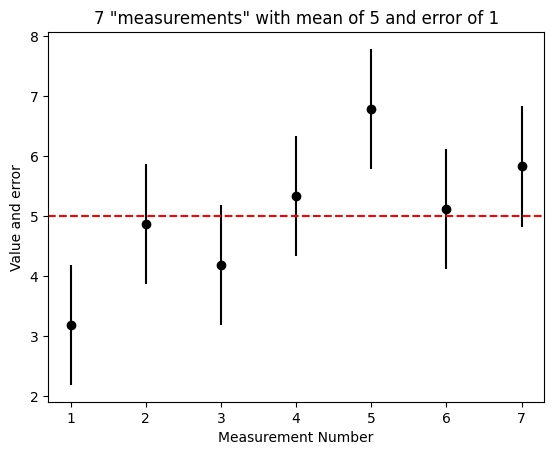

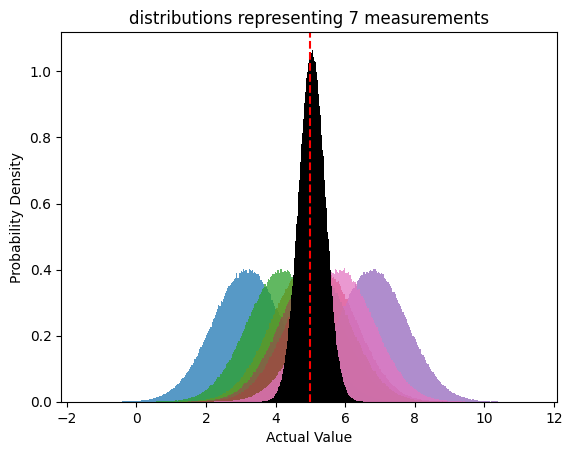

In [9]:

#----------------------------------------------------------------------
# Standard deviation of the mean
sigma = 1
mean = 5

# -- number of samples to draw from a Gaussian distribution
n = 7
# -- These numbers represent measurements with error of "sigma"
np.random.seed(1973)
numbers = np.random.normal(mean,sigma,n)

# -- Make some pretty figures
plt.figure(3)
plt.clf()
plt.errorbar(np.arange(n)+1,numbers,yerr=np.ones(n)*sigma,fmt='o',color='black')
plt.axhline(y=mean,linestyle='--',color='red')
plt.title(str(n)+' "measurements" with mean of '+str(mean)+' and error of '+str(sigma))
plt.xlabel('Measurement Number')
plt.ylabel('Value and error')

plt.figure(4)
plt.clf()
for val in numbers:
    plt.hist(np.random.normal(val,sigma,sz),bins=bins,alpha=0.75,density=True)

plt.xlabel('Actual Value')
plt.ylabel('Probability Density')
plt.title('distributions representing '+str(n)+' measurements')

# -- Take the mean of all these distributions
final = []
i = 0
for val in numbers:
    if i == 0:
        final = np.random.normal(val,sigma,sz)
    else:
        final += np.random.normal(val,sigma,sz)
    i += 1
    
final /= np.float(n)

plt.figure(4)
plt.hist(final,bins=bins,alpha=1,color='black',density=True)
plt.axvline(x=mean,linestyle='--',color='red')

print('The mean and standard deviation of the measurements: %.2f +/- %.2f'%(mean,sigma))
print('The mean and standard deviation of the mean of the measurements: %.2f +/- %.2f'% \
      (np.mean(final),np.std(final,ddof=1)))

